In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [2]:
base_model = MobileNetV2(weights='imagenet', include_top=False,input_shape=(224, 224, 3))

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
base_model.trainable = False

In [4]:
x = base_model.output
x = GlobalAveragePooling2D()(x) # Pooling layer
x = Dense(128, activation='relu')(x) # Dense layer
predictions = Dense(10, activation='softmax')(x)

In [5]:
model = Model(inputs=base_model.input, outputs=predictions)

In [6]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2,horizontal_flip=True, zoom_range=0.2, shear_range=0.2)

In [8]:
train_generator = datagen.flow_from_directory(
    r"D:\datasets\DL\Animals\raw-img",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training' 
)

Found 20947 images belonging to 10 classes.


In [10]:
validation_generator = datagen.flow_from_directory(
    r"D:\datasets\DL\Animals\raw-img",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation' 
)

Found 5232 images belonging to 10 classes.


In [11]:
model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10


C:\Users\Tanmay LImje\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


655/655 ━━━━━━━━━━━━━━━━━━━━ 515s 780ms/step - accuracy: 0.8742 - loss: 0.4084 - val_accuracy: 0.9448 - val_loss: 0.1659
Epoch 2/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 209s 317ms/step - accuracy: 0.9486 - loss: 0.1636 - val_accuracy: 0.9453 - val_loss: 0.1730
Epoch 3/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 204s 310ms/step - accuracy: 0.9563 - loss: 0.1332 - val_accuracy: 0.9369 - val_loss: 0.1928
Epoch 4/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 204s 310ms/step - accuracy: 0.9573 - loss: 0.1279 - val_accuracy: 0.9448 - val_loss: 0.1851
Epoch 5/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 204s 309ms/step - accuracy: 0.9638 - loss: 0.1094 - val_accuracy: 0.9501 - val_loss: 0.1611
Epoch 6/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 203s 309ms/step - accuracy: 0.9699 - loss: 0.0923 - val_accuracy: 0.9469 - val_loss: 0.1718
Epoch 7/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 203s 309ms/step - accuracy: 0.9723 - loss: 0.0818 - val_accuracy: 0.9463 - val_loss: 0.1748
Epoch 8/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 205s 311ms/step - accuracy: 0.9741 - loss: 0.08

In [12]:
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test Accuracy: {test_acc}')

164/164 ━━━━━━━━━━━━━━━━━━━━ 41s 250ms/step - accuracy: 0.9497 - loss: 0.1805
Test Accuracy: 0.9493501782417297


In [13]:
x_val, y_val = next(validation_generator)
predictions = model.predict(x_val)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step


In [14]:
predicted_labels = np.argmax(predictions, axis=1)

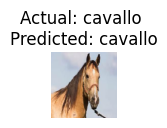

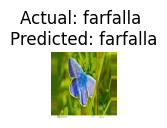

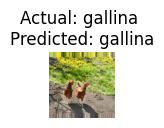

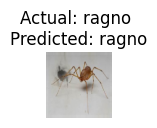

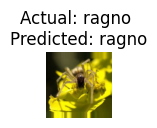

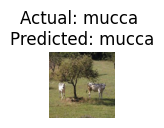

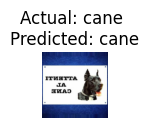

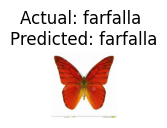

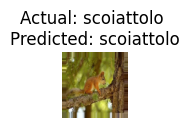

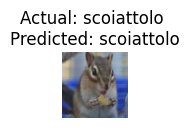

In [16]:
class_labels = list(train_generator.class_indices.keys())
n = 10

for i in range(n):
    
    plt.figure(figsize=(10, 10))
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_val[i]) 
    
    actual_label = class_labels[np.argmax(y_val[i])]
    predicted_label = class_labels[predicted_labels[i]]
    
    plt.title(f"Actual: {actual_label} \nPredicted: {predicted_label}")
    plt.axis('off')
    
plt.show()